In [1]:
%pip install scikit-learn --quiet
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

Note: you may need to restart the kernel to use updated packages.


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [2]:
X ,y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

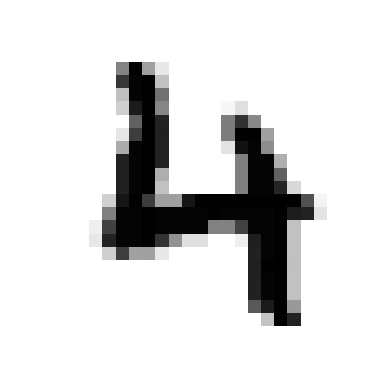

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[37000]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
y.iloc[37000]


'4'

In [5]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [6]:
import numpy as np

shuffel_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffel_index], y_train.iloc[shuffel_index]

In [7]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.96595, 0.9544 , 0.96305])

In [11]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [12]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90815, 0.90935, 0.91145])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train_5, y_train_pred)
conf_mx

array([[54333,   246],
       [ 2086,  3335]])

In [15]:
y_train_perfect_pred = y_train_5  # perfect prediction
conf_mx = confusion_matrix(y_train_5, y_train_perfect_pred)
conf_mx

array([[54579,     0],
       [    0,  5421]])

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.9313041049986037, 0.6152001475742483)

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7409464563430349

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-11259.6248953])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

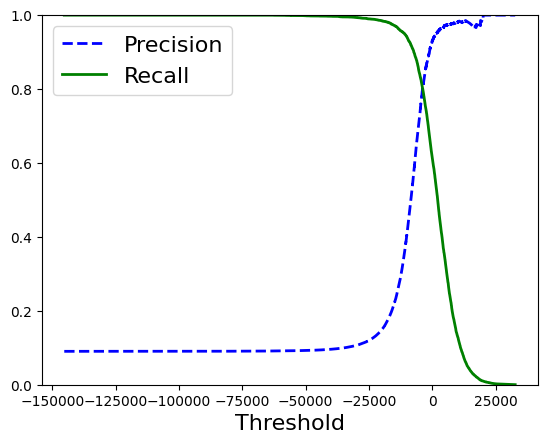

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid()

In [22]:
y_train_pred_90 = (y_scores > 7000)
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9750566893424036, 0.2379634753735473)

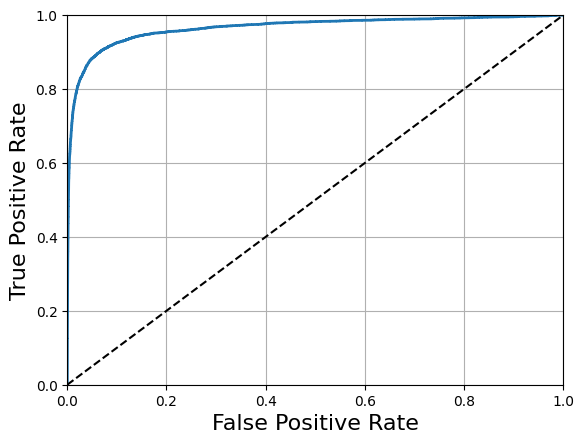

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid()
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9653093781438663)

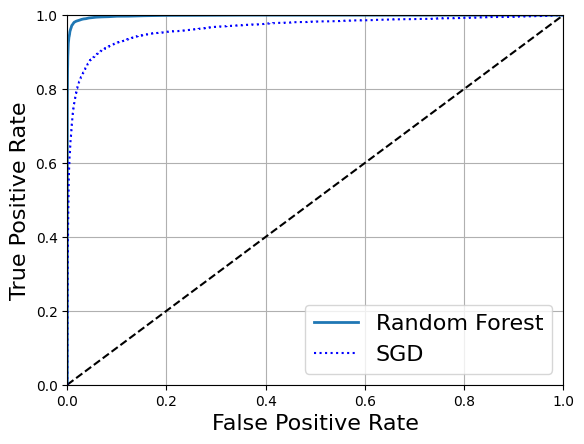

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr, tpr, "b:", label="SGD")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [26]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['4'], dtype='<U1')

In [27]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_max = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[54579,     0],
       [    0,  5421]])

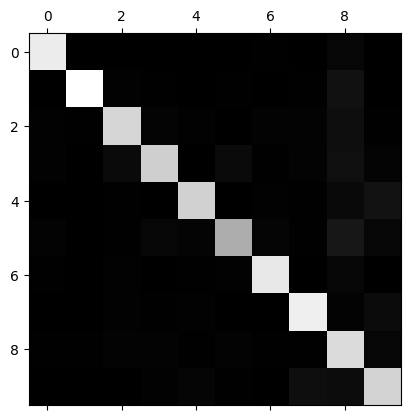

In [28]:
plt.matshow(conf_max, cmap=plt.cm.gray)
plt.show()

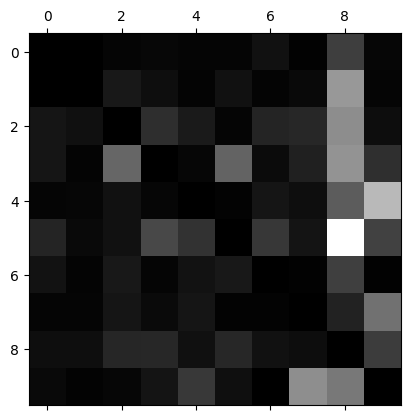

In [29]:
row_sums = conf_max.sum(axis=1, keepdims=True)
norm_conf_mx = conf_max / row_sums  # Normalize by row (i.e., by the number of images in each class)

np.fill_diagonal(norm_conf_mx, 0)  # To keep only errors
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Convert y_train to integer for comparison operations
y_train_int = y_train.astype(int)
y_train_large = (y_train_int >= 7)
y_train_odd = (y_train_int % 2 == 1)
y_multilable = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier()

In [33]:
knn_clf.predict([some_digit])

c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False]])

In [34]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilable, cv=3)
fl_score = f1_score(y_multilable, y_train_knn_pred, average="macro")
fl_score

0.977398649175524

In [39]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test




c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


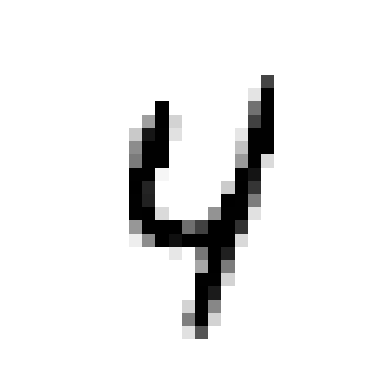

In [46]:
import matplotlib.pyplot as plt

def plot_digit(data):
	image = np.array(data).reshape(28, 28)
	plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
	plt.axis("off")
	plt.show()

# choose a valid index from your test set
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[3700]])
plot_digit(clean_digit)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = [
    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4,]},
]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_

np.float64(0.9718166666666667)

Note: you may need to restart the kernel to use updated packages.


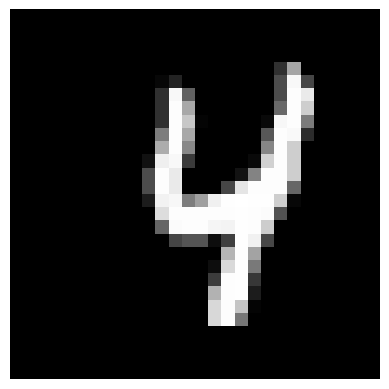

In [52]:



%pip install torchvision --quiet
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Define the shift transform
shift_transform = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
])

# Example: apply to a single test image (row 0 of X_test)
img_arr = X_test.iloc[3700].values.reshape(28, 28).astype(np.uint8)
img_pil = Image.fromarray(img_arr)
shifted_tensor = shift_transform(img_pil)

# To visualize the result
plt.imshow(shifted_tensor.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Apply the shift transform to the first 100 images in X_train as an example
shifted_images = []
for i in range(100):  # change 100 to len(X_train) to process all images
	img_arr = X_train.iloc[i].values.reshape(28, 28).astype(np.uint8)
	img_pil = Image.fromarray(img_arr)
	shifted_img = shift_transform(img_pil)
	shifted_images.append(shifted_img)

# shifted_images now contains the transformed tensors
shifted_images


[tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

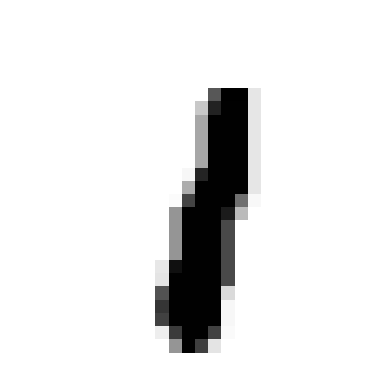

In [57]:
plot_digit(shifted_images[22].numpy().reshape(28, 28))

In [63]:
import numpy as np

def shift_img(image, direction, pixels):
    """
    Shift the image in the specified direction by the given number of pixels.
    :param image: 2D numpy array representing the image
    :param direction: 'up', 'down', 'left', or 'right'
    :param pixels: number of pixels to shift
    :return: shifted image as a 2D numpy array
    """
    image = image.reshape(28, 28)
    shifted = np.zeros_like(image)
    
    if direction == 'up':
        return np.roll(image, -pixels, axis=0)
    elif direction == 'down':
        return np.roll(image, pixels, axis=0)
    elif direction == 'left':
        return np.roll(image, -pixels, axis=1)
    elif direction == 'right':
        return np.roll(image, pixels, axis=1)
    
    return shifted.reshape(image.shape)

In [65]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
from sklearn.model_selection import train_test_split
X, y = mnist.data / 255.0, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_augmented = []
y_augmented = []

for img, label in zip(X_train.values, y_train.values):
    # Original image
    X_augmented.append(img)
    y_augmented.append(label)
    
    # Shifted images
    img_2d = img.reshape(28, 28)
    for direction in ['up', 'down', 'left', 'right']:
        shifted_img_2d = shift_img(img_2d, direction, 2)  # Shift by 2 pixels
        X_augmented.append(shifted_img_2d.flatten())
        y_augmented.append(label)



X_train_aug = np.array(X_augmented)
y_train_aug = np.array(y_augmented)

print(f"Original training set size: {len(X_train)}")
print(f"Augmented training set size: {len(X_train_aug)}")

Original training set size: 56000
Augmented training set size: 280000


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_aug, y_train_aug)

y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier on test set: {accuracy}")

c:\Users\user\.vscode\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy of KNN classifier on test set: 0.9719285714285715


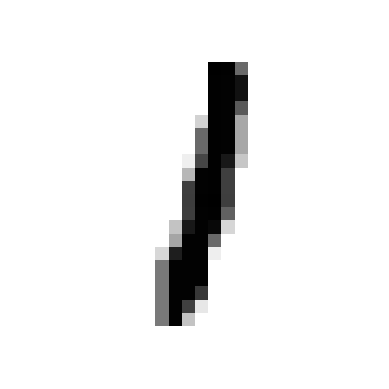

In [70]:
plot_digit(X_train_aug[3700])